Epoch 0, Loss: 0.7067
Epoch 100, Loss: 0.4796
Epoch 200, Loss: 0.3501
Epoch 300, Loss: 0.3139
Epoch 400, Loss: 0.3017
Epoch 500, Loss: 0.2955
Epoch 600, Loss: 0.2925
Epoch 700, Loss: 0.2908
Epoch 800, Loss: 0.2895
Epoch 900, Loss: 0.2884
Test Accuracy: 0.86


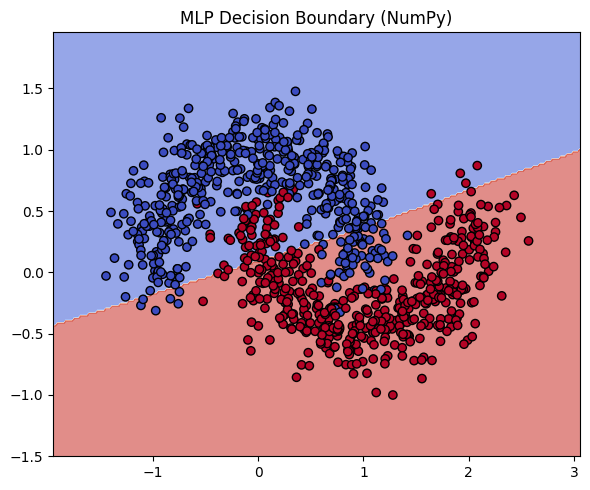

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic binary classification data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

# Step 2: Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# Step 4: Initialize weights
input_dim = X_train.shape[1]  # 2 features
hidden_dim = 10
output_dim = 1

np.random.seed(42)

W1 = np.random.randn(input_dim, hidden_dim) * 0.1
b1 = np.zeros((1, hidden_dim))

W2 = np.random.randn(hidden_dim, output_dim) * 0.1
b2 = np.zeros((1, output_dim))

# Step 5: Training parameters
learning_rate = 0.1
epochs = 1000
losses = []

# Step 6: Training loop
for epoch in range(epochs):

    # Forward pass
    Z1 = X_train @ W1 + b1
    A1 = relu(Z1)

    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)

    # Loss (Binary Cross Entropy)
    m = y_train.shape[0]
    loss = -np.mean(
        y_train * np.log(A2 + 1e-8) +
        (1 - y_train) * np.log(1 - A2 + 1e-8)
    )
    losses.append(loss)

    # Backward pass
    dZ2 = A2 - y_train
    dW2 = A1.T @ dZ2 / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X_train.T @ dZ1 / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Step 7: Evaluate
Z1_test = X_test @ W1 + b1
A1_test = relu(Z1_test)
Z2_test = A1_test @ W2 + b2
A2_test = sigmoid(Z2_test)

y_pred = (A2_test > 0.5).astype(int)
accuracy = np.mean(y_pred == y_test)

print(f"Test Accuracy: {accuracy:.2f}")

# Step 8: Plot decision boundary
def plot_decision_boundary(X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    h = 0.02
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)

    Z1 = grid_scaled @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)

    preds = (A2 > 0.5).astype(int).reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, preds, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.coolwarm,
                edgecolors='k')
    plt.title("MLP Decision Boundary (NumPy)")
    plt.tight_layout()
    plt.show()

plot_decision_boundary(X, y)
